<font size='3'><b>Bank Churn Machine Learning</b></font>

In [42]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
#Basic information 
df.head()
df.tail()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
print(f'Dataset contains {df.shape[0]} rows and {df.shape[1]} columns ')

Dataset contains 10000 rows and 14 columns 


In [5]:
cate_cols=[]
cont_cols=[]
for column in df.columns: 
    if df[column].nunique()<=10:
        cate_cols.append(column)
    else:
        cont_cols.append(column)

In [6]:
cate_cols

['Geography',
 'Gender',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [7]:
cont_cols

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'EstimatedSalary']

In [8]:
#Check null values / duplicated values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
#Drop irrelevant features
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [11]:
df=pd.get_dummies(df,drop_first=True,dtype=int)

In [12]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [13]:
X=df.drop('Exited',axis=1)
y=df['Exited']

In [14]:
#There is an imbalance in the prediction variable 
from imblearn.over_sampling import SMOTE

In [15]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [16]:
cate_cols=[]
cont_cols=[]
for column in X_res.columns: 
    if X_res[column].nunique()<=10:
        cate_cols.append(column)
    else:
        cont_cols.append(column)

In [17]:
cont_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

In [18]:
#Feature Scaling 
st=StandardScaler()

In [19]:
X_res[cont_cols+['NumOfProducts']]=st.fit_transform(X_res[cont_cols+['NumOfProducts']])

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

In [21]:
#Train the models
log=LogisticRegression().fit(X_train,y_train)
y_pred1=log.predict(X_test)
log_score=accuracy_score(y_test,y_pred1)
svm=SVC().fit(X_train,y_train)
y_pred2=svm.predict(X_test)
svm_score=accuracy_score(y_test,y_pred2)

In [22]:
score=[]
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [23]:
knn=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
y_pred3=knn.predict(X_test)
knn_score=accuracy_score(y_test,y_pred3)

In [24]:
dt=DecisionTreeClassifier().fit(X_train,y_train)
y_pred4=dt.predict(X_test)
dt_score=accuracy_score(y_test,y_pred4)

In [25]:
rf=RandomForestClassifier().fit(X_train,y_train)
y_pred5=rf.predict(X_test)
rf_score=accuracy_score(y_test,y_pred5)

In [26]:
gb=GradientBoostingClassifier().fit(X_train,y_train)
y_pred6=gb.predict(X_test)
gb_score=accuracy_score(y_test,y_pred6)

In [27]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4),
                              accuracy_score(y_test,y_pred5),
                              accuracy_score(y_test,y_pred6)]})

In [28]:
final_data

,Models,ACC
0,LR,0.779975
1,SVC,0.839925
2,KNN,0.834903
3,DT,0.787194
4,RF,0.867232
5,GBC,0.842750


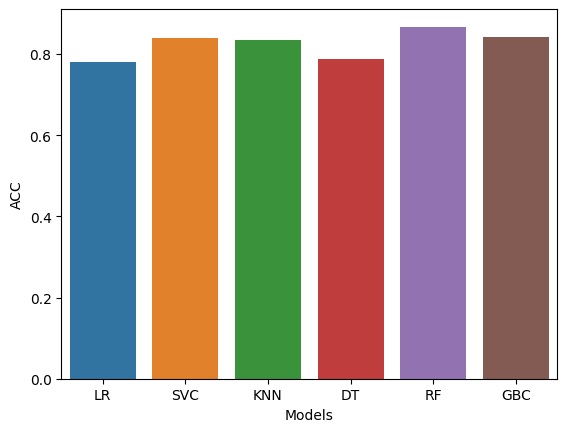

In [29]:
sns.barplot(x=final_data['Models'],y=final_data['ACC'],hue=final_data['Models'],palette='tab10',legend=False)
plt.show()

In [30]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'PRE':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4),
                              precision_score(y_test,y_pred5),
                              precision_score(y_test,y_pred6)]})

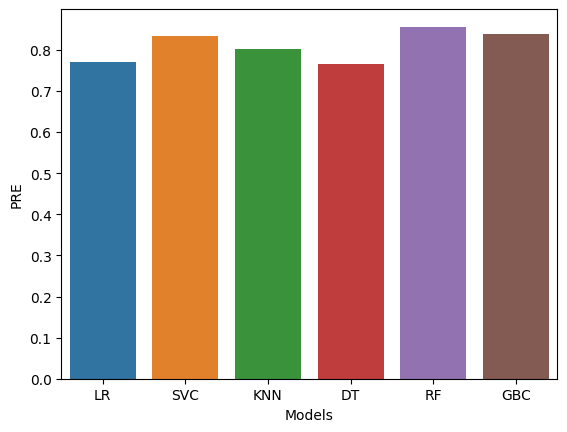

In [31]:
sns.barplot(x=final_data['Models'],y=final_data['PRE'],hue=final_data['Models'],palette='tab10',legend=False)
plt.show()

In [32]:
final_data=pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],
                        'f1':[f1_score(y_test,y_pred1),
                              f1_score(y_test,y_pred2),
                              f1_score(y_test,y_pred3),
                              f1_score(y_test,y_pred4),
                              f1_score(y_test,y_pred5),
                              f1_score(y_test,y_pred6)]})

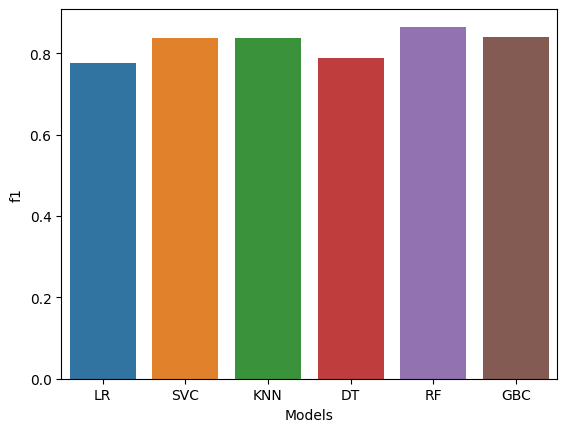

In [33]:
sns.barplot(x=final_data['Models'],y=final_data['f1'],hue=final_data['Models'],palette='tab10',legend=False)
plt.show()

In [34]:
model=rf.fit(X_res,y_res)

In [35]:
#We try to predict the following values 
new_data=[619,42,2,0.0,0,0,0,101348.88,0,0,0]
new_data_df = pd.DataFrame(new_data, index=X.columns).T

In [36]:
new_data_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.0,0.0,0.0,0.0,101348.88,0.0,0.0,0.0


In [43]:
scaler_columns = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
scaled_new_data_df = pd.DataFrame(st.transform(new_data_df[scaler_columns].values), columns=scaler_columns, index=[0])
new_data_scaled = pd.concat([scaled_new_data_df, new_data_df[['HasCrCard','IsActiveMember','Geography_Germany','Geography_Spain','Gender_Male']]], axis=1)

In [46]:
new_order=['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain','Gender_Male']
new_data_scaled=new_data_scaled.reindex(new_order,axis=1)

In [47]:
model.predict(new_data_scaled)

array([1])